In [1]:
import csv
import numpy as np
# import xlsxwriter
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from natsort import natsorted
import sys
#from tabulate import tabulate
import os
from matplotlib.animation import FuncAnimation
# from xlsxwriter import Workbook
# get_ipython().run_line_magic('matplotlib', 'inline')
import glob
import pickle
import shutil
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
def label(x,y,a,b,pur="all"):
    plt.xlabel(x,fontsize=18)
    plt.ylabel(y,fontsize=18)
    if pur=="all":
        plt.rcParams['figure.figsize'] = [a,b]
    elif pur=="chi2":
        plt.title("Chi2 Analysis, S-%s, Channel %s"%(a,b), fontsize=20)
    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)
    return 

In [21]:
N_det = 7
Det_Comb=21

energyThreshold = 100
timeWindow=5e-7
Date="103024"
         #Not required if you are doing the full run. 
#first cut_data event or 2nd, Ex: index=0 means collecting first 60 second of data and 
                                 #index=1 means collecting second 60 second of data and so on...     
# run_index=0      #int(sys.argv[1])    #Type the index of run mentioned in the data file, required while taking multiple dataset 


activity = 0.8
cut_data=60               #Select the required second of data
read_folder_all=glob.glob("../ASCID_efficiency/DAQ/NoPlastic_1cm2_1mm_NoSource_BetaDetection_directExposure*")                   #reading data folder
Total_folder = len(read_folder_all)
read_folder_all.sort(key=lambda x: os.stat(x).st_ctime)
folder_index = 0
read_folder= read_folder_all[folder_index]            #glob.glob("../RUN4/Sc46/DAQ/*")
save_folder="..//ASCID_efficiency/Figures" 

print(f"Folder name {read_folder_all[folder_index]}")
index=0

innerChannel=np.arange(16,26)

date="%s"%(Date)
serial=np.array(["1st","2nd","3rd","4th","5th","6th", "7th", "8th"])
save_folder_each = os.path.join(save_folder, "Folder_%d"%folder_index)

Folder name ../ASCID_efficiency/DAQ\NoPlastic_1cm2_1mm_NoSource_BetaDetection_directExposure


In [22]:
files = glob.glob('%s/RAW/*.CSV'%read_folder)
files=natsorted(files)#[0:26]
# files = files
# print(files)
MinTime=np.zeros(N_det)
for nf,nfile in enumerate(files):
    # nfile1 = os.path.join(folder_path, nfile)
    file = open(nfile)
    csvreader = csv.reader(file, delimiter = ';')
    header = next(csvreader)
    line_count = 0
    for row in csvreader:
        if line_count == 0:
            MinTime[nf] = float(row[2]) * 1e-12
            break
minTime=np.min(MinTime)


# In[5]:

data=[]
for j in range(3):                                     #3=channel, time, calib. energy
    b=[]
    data.append(b)
nEvent=np.zeros(len(files))
for nf,nfile in enumerate(files):
    # nfile1 = os.path.join(folder_path, nfile)
    file = open(nfile)
    csvreader = csv.reader(file, delimiter = ';')
    header = next(csvreader)
    line_count = 0
    for row in csvreader:
        if float(row[2])*1e-12 - minTime>=cut_data*index:
            data[0].append(int(row[1]))
            data[1].append(float(row[2])*1e-12 - minTime)
            data[2].append(float(row[3]))     # row[4] = Caliberated energy, row[3] = ADC energy sometime, else row[3] = Caliberated energy
            line_count += 1
            # if line_count%1000000==0:
            #     print("%d M data loaded"%int(line_count/1000000))
            if float(row[2])*1e-12 - minTime>cut_data*(index+1):
                data[0].pop()
                data[1].pop()
                data[2].pop()
                break
    nEvent[nf]=line_count-1
    print("file %d done"%nf)
nEvents=int(nEvent.sum())


Data_Time=round((data[1][nEvents-1]-data[1][0]),0)
print("Total Time for this data set is %d s"%Data_Time)

file 0 done
Total Time for this data set is 60 s


In [13]:
save_folder="../ASCID_beta/Figures"

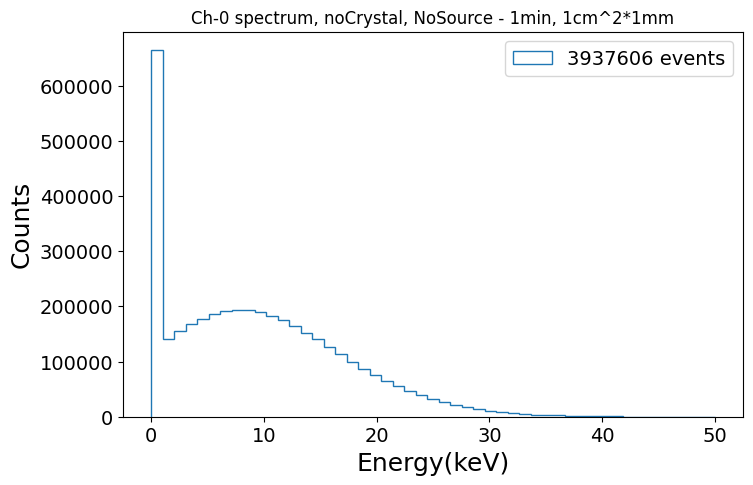

In [25]:
h = plt.hist(data[2], bins = np.linspace(0, 50, 50), histtype = "step", label = "%d events"%len(data[2]))
plt.legend(fontsize = 14)
label("Energy(keV)", "Counts", 8, 5)
plt.title("Ch-0 spectrum, noCrystal, NoSource - 1min, 1cm^2*1mm")
plt.savefig("%s/Energy_noSource_noPlastic.jpg"%(save_folder))